In [156]:
#どの問題か，ファイル名やノートブック内のテキストセルで記載してください
# 基礎分析では，平均をbarchartで表していますが，
#boxplotを使えば全ての変数の中央値とばらつきが同時に表示できます．
#近傍法の正解率を出せたので，交差検証やパラメタの比較
#，モデルの比較に取り組んでみましょう

In [157]:
#アヤメの計測データから三種類のアヤメの品種を分類しよう。
#学習用データ (train.tsv)
#評価用データ (test.tsv)
#応募用サンプルファイル (sample_submit.csv)

In [158]:
import glob
m=glob.glob('**/test.tsv')
m

['Downloads\\test.tsv']

In [159]:
mm=glob.glob('**/train.tsv')
mm

['Downloads\\train.tsv']

In [160]:
mmm=glob.glob('**/sample_submit.csv')
mmm

['Downloads\\sample_submit.csv']

In [161]:
import pandas as pd

In [162]:
test=pd.read_csv('Downloads//test.tsv',sep='\t')
test

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,2,6.1,2.8,4.7,1.2
1,7,6.3,2.5,4.9,1.5
2,8,6.2,3.4,5.4,2.3
3,10,6.7,3.1,4.7,1.5
4,13,5.0,3.4,1.6,0.4
...,...,...,...,...,...
70,137,5.8,2.6,4.0,1.2
71,141,5.1,3.5,1.4,0.2
72,144,6.2,2.2,4.5,1.5
73,146,6.5,3.0,5.2,2.0


In [163]:
train=pd.read_table('Downloads//train.tsv')
train

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,0,5.3,3.7,1.5,0.2,Iris-setosa
1,1,6.8,2.8,4.8,1.4,Iris-versicolor
2,3,6.1,3.0,4.9,1.8,Iris-virginica
3,4,6.4,3.2,5.3,2.3,Iris-virginica
4,5,6.3,3.3,4.7,1.6,Iris-versicolor
...,...,...,...,...,...,...
70,142,6.4,3.2,4.5,1.5,Iris-versicolor
71,143,5.4,3.9,1.7,0.4,Iris-setosa
72,145,5.6,3.0,4.1,1.3,Iris-versicolor
73,148,5.2,2.7,3.9,1.4,Iris-versicolor


In [164]:
sample=pd.read_csv('Downloads\\sample_submit.csv')
sample

,2,Iris-setosa
0,7,Iris-versicolor
1,8,Iris-virginica
2,10,Iris-setosa
3,13,Iris-versicolor
4,15,Iris-versicolor
...,...,...
69,137,Iris-versicolor
70,141,Iris-setosa
71,144,Iris-versicolor
72,146,Iris-virginica


In [165]:
train.isna().sum()

id                    0
sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

In [166]:
train.describe()

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,72.773333,5.922667,3.097333,3.844000,1.220000
std,46.039223,0.877277,0.443565,1.852116,0.787572
min,0.000000,4.400000,2.000000,1.000000,0.100000
25%,33.000000,5.100000,2.800000,1.550000,0.200000
50%,72.000000,5.900000,3.000000,4.400000,1.400000
75%,114.000000,6.450000,3.350000,5.250000,1.800000
max,149.000000,7.900000,4.200000,6.900000,2.500000


In [167]:
train.dtypes

id                      int64
sepal length in cm    float64
sepal width in cm     float64
petal length in cm    float64
petal width in cm     float64
class                  object
dtype: object

In [168]:
import matplotlib.pyplot as plt
import matplotlib as mpl
train_setosa=train[train['class']=="Iris-setosa"]
train_versicolor=train[train['class']=="Iris-versicolor"]
train_virginica=train[train['class']=="Iris-virginica"]
y1=train_setosa['sepal length in cm']
y2=train_setosa['sepal width in cm']
y3=train_setosa['petal length in cm']
y4=train_setosa['petal width in cm']
y1_2=train_versicolor['sepal length in cm']
y2_2=train_versicolor['sepal width in cm']
y3_2=train_versicolor['petal length in cm']
y4_2=train_versicolor['petal width in cm']
y1_3=train_virginica['sepal length in cm']
y2_3=train_virginica['sepal width in cm']
y3_3=train_virginica['petal length in cm']
y4_3=train_virginica['petal width in cm']

In [169]:
match1=(y1,y1_2,y1_3)
match2=(y2,y2_2,y2_3)
match3=(y3,y3_2,y3_3)
match4=(y4,y4_2,y4_3)


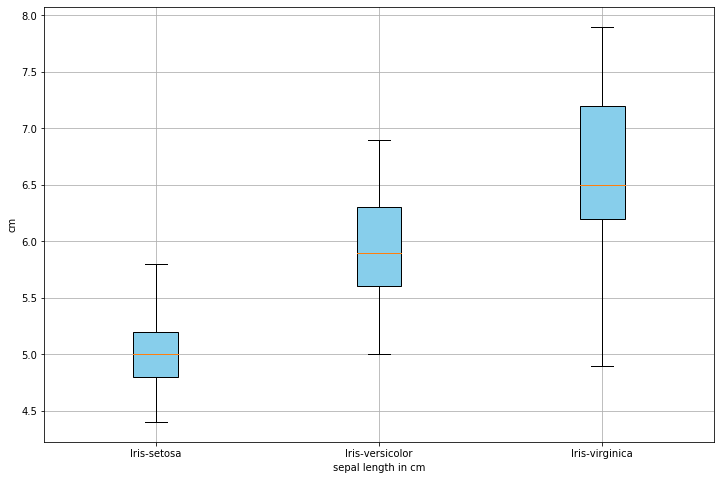

In [170]:
# 箱ひげ
fig, axes = plt.subplots(figsize = (12, 8))
plt.boxplot(match1,patch_artist=True, widths=0.2,boxprops=dict(facecolor='skyblue',
                         color='black', linewidth=1))
plt.xlabel('sepal length in cm')
plt.ylabel('cm')
axes.set_xticklabels(['Iris-setosa','Iris-versicolor','Iris-virginica'])
plt.grid()
# 描画
plt.show()

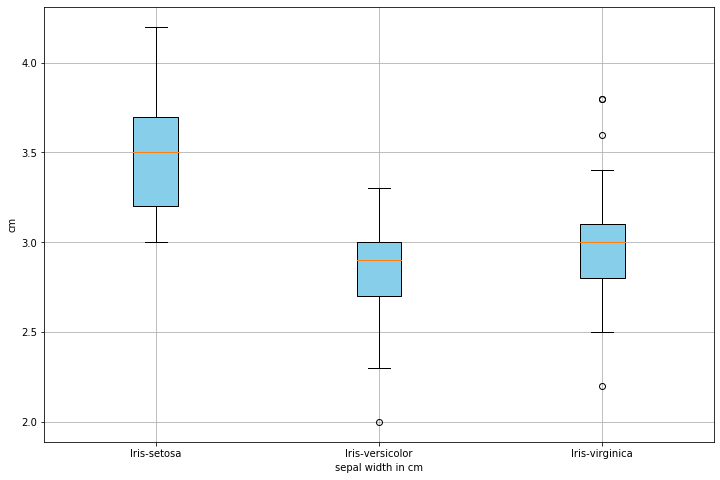

In [171]:
fig, axes = plt.subplots(figsize = (12, 8))
plt.boxplot(match2,patch_artist=True, widths=0.2,boxprops=dict(facecolor='skyblue',
                         color='black', linewidth=1))
plt.xlabel('sepal width in cm')
plt.ylabel('cm')
axes.set_xticklabels(['Iris-setosa','Iris-versicolor','Iris-virginica'])
plt.grid()
# 描画
plt.show()

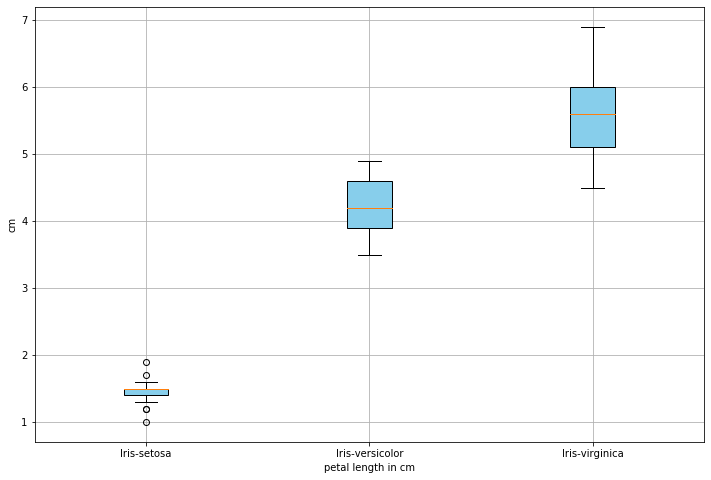

In [172]:
fig, axes = plt.subplots(figsize = (12, 8))
plt.boxplot(match3,patch_artist=True, widths=0.2,boxprops=dict(facecolor='skyblue',
                         color='black', linewidth=1))
plt.xlabel('petal length in cm')
plt.ylabel('cm')
axes.set_xticklabels(['Iris-setosa','Iris-versicolor','Iris-virginica'])
plt.grid()
# 描画
plt.show()

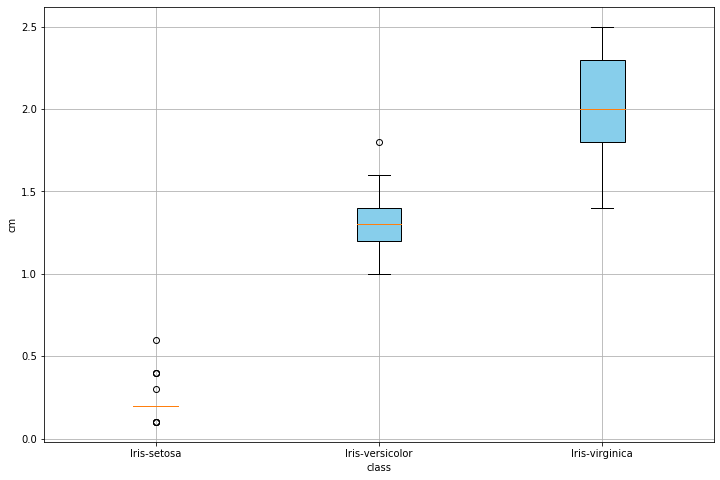

In [173]:
fig, axes = plt.subplots(figsize = (12, 8))
plt.boxplot(match4,patch_artist=True, widths=0.2,boxprops=dict(facecolor='skyblue',
                         color='black', linewidth=1))
plt.xlabel('class')
plt.ylabel('cm')
axes.set_xticklabels(['Iris-setosa','Iris-versicolor','Iris-virginica'])
plt.grid()
# 描画
plt.show()

In [174]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [175]:
#近傍法
model = KNeighborsClassifier(n_neighbors=3)

In [176]:
X_train=train.loc[:,['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm']]

In [177]:
Y_train=train.loc[:,["class"]]

In [178]:
model.fit(X_train,Y_train)

C:\Users\motok\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [179]:
model.score(X_train,Y_train)

0.9733333333333334

In [180]:
X_test=test.loc[:,['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm']]
Y_pred=model.predict(X_test)

In [181]:
accuracy_score(Y_train,Y_pred)

0.28

In [182]:
data=[[5.2,3.1,1.0,3.4]]
model.predict(data)

array(['Iris-setosa'], dtype=object)

In [183]:
# パラメタ比較
from sklearn.svm import SVC
svm = SVC(C=1.0, gamma=0.1)

In [184]:
svm.fit(X_train,Y_train)

C:\Users\motok\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [185]:
Y_pred_SVM=svm.predict(X_test)
svm.score(X_test,Y_pred_SVM)

1.0

In [186]:
data=[[5.2,3.1,1.0,3.4]]
svm.predict(data)

array(['Iris-setosa'], dtype=object)

In [187]:
accuracy_score(Y_train,Y_pred_SVM)

0.29333333333333333

In [188]:
import numpy as  np

In [189]:
np.logspace(-3, 2, num=6) 

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [190]:
# ハイパーパラメタの組み合わせを作る
plist = [(gamma, C) for gamma in np.logspace(-3, 2, num=6) for C in np.logspace(-3, 2, num=6)]

In [191]:
plist[:10]

[(0.001, 0.001),
 (0.001, 0.01),
 (0.001, 0.1),
 (0.001, 1.0),
 (0.001, 10.0),
 (0.001, 100.0),
 (0.01, 0.001),
 (0.01, 0.01),
 (0.01, 0.1),
 (0.01, 1.0)]

In [192]:
scores = {}
for (gamma, C) in plist:
  svm = SVC(gamma=gamma, C=C)
  svm.fit(X_train,Y_train)
  scores[(gamma, C)] = svm.score(X_test, Y_pred)

C:\Users\motok\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\motok\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\motok\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\motok\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [193]:
scores = pd.Series(scores)
scores.head()

0.001  0.001     0.320000
       0.010     0.320000
       0.100     0.320000
       1.000     0.653333
       10.000    0.880000
dtype: float64

In [194]:
print(scores.max())
print(scores.idxmax())

0.9866666666666667
(0.01, 100.0)


In [195]:
import seaborn as sns

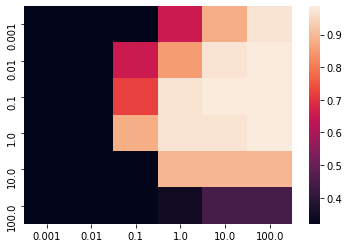

In [196]:
sns.heatmap(scores.unstack())

In [197]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [198]:
#決定木比較
score_history={}
for i in range(1,20):
    max_depth=i
    model_DTC= DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)
    model_DTC.fit(X_train,Y_train)
    Y_pred_DTC=model_DTC.predict(X_test)
    score_history[max_depth]=[model_DTC.score(X_train,Y_train),model_DTC.score(X_test,Y_pred_DTC)]
    data=[[5.2,3.1,1.0,3.4]]
    print(i,model_DTC.predict(data),accuracy_score(Y_train,Y_pred_DTC))
score_history


1 ['Iris-virginica'] 0.38666666666666666
2 ['Iris-versicolor'] 0.29333333333333333
3 ['Iris-virginica'] 0.30666666666666664
4 ['Iris-virginica'] 0.30666666666666664
5 ['Iris-virginica'] 0.30666666666666664
6 ['Iris-virginica'] 0.30666666666666664
7 ['Iris-virginica'] 0.30666666666666664
8 ['Iris-virginica'] 0.30666666666666664
9 ['Iris-virginica'] 0.30666666666666664
10 ['Iris-virginica'] 0.30666666666666664
11 ['Iris-virginica'] 0.30666666666666664
12 ['Iris-virginica'] 0.30666666666666664
13 ['Iris-virginica'] 0.30666666666666664
14 ['Iris-virginica'] 0.30666666666666664
15 ['Iris-virginica'] 0.30666666666666664
16 ['Iris-virginica'] 0.30666666666666664
17 ['Iris-virginica'] 0.30666666666666664
18 ['Iris-virginica'] 0.30666666666666664
19 ['Iris-virginica'] 0.30666666666666664


{1: [0.72, 1.0],
 2: [0.9333333333333333, 1.0],
 3: [0.9866666666666667, 1.0],
 4: [1.0, 1.0],
 5: [1.0, 1.0],
 6: [1.0, 1.0],
 7: [1.0, 1.0],
 8: [1.0, 1.0],
 9: [1.0, 1.0],
 10: [1.0, 1.0],
 11: [1.0, 1.0],
 12: [1.0, 1.0],
 13: [1.0, 1.0],
 14: [1.0, 1.0],
 15: [1.0, 1.0],
 16: [1.0, 1.0],
 17: [1.0, 1.0],
 18: [1.0, 1.0],
 19: [1.0, 1.0]}

In [199]:
#交差検証
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
models = []
models.append(("KNC",KNeighborsClassifier()))
models.append(("DTC",DecisionTreeClassifier()))
models.append(("SVM",SVC()))

#複数のclassifier の適用
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=42)
    result = cross_val_score(model,X_train,Y_train, cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

C:\Users\motok\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\motok\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\motok\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\motok\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was pass

KNC 0.9607142857142857
DTC 0.9321428571428572
SVM 0.9464285714285715


C:\Users\motok\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\motok\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\motok\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\motok\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [200]:
#モデル比較
from sklearn.model_selection import GridSearchCV

In [201]:
np.logspace(-3, 2, num=6)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [202]:
# グリッドサーチするパラメータを辞書にする
param_grid = { 'C': np.logspace(-3, 2, num=6)
               ,'gamma':np.logspace(-3, 2, num=6)}

In [203]:
# GridSearchCVオブジェクト
gs = GridSearchCV(estimator=SVC(),
                  param_grid=param_grid,
                  cv=4)

In [204]:
# ハイパーパラメータの組み合わせの学習
gs.fit(X_train,Y_train)

C:\Users\motok\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\motok\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\motok\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\motok\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=4, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [205]:
gs.best_score_

0.9868421052631579

In [206]:
# パラメタ
gs.best_params_

{'C': 10.0, 'gamma': 0.1}

In [207]:
# 評価
Y_pred_gs=gs.predict(X_test)
gs.score(X_test,Y_pred_gs)

1.0

In [208]:
accuracy_score(Y_train,Y_pred_gs)

0.29333333333333333